# <center>Домашнее задание № 3.<br> Анализ данных по доходу населения UCI Adult</center>

Уникальные значения признаков:
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('adult.data.csv')
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [3]:
sex_counts = data['sex'].value_counts()
print(sex_counts)

Male      21790
Female    10771
Name: sex, dtype: int64


**2. Каков средний возраст (признак *age*) женщин?**

In [4]:
# Отфильтрую строки, в которых значение столбца 'sex' равно 'Female'
female_data = data.loc[data['sex'] == 'Female']

# Найду средний возраст женщин
average_female_age = female_data['age'].mean()

# Выведу результат
print("Средний возраст женщин: {:.2f}".format(average_female_age))

Средний возраст женщин: 36.86


**3. Какова доля граждан Германии (признак *native-country*)?**

In [5]:
# Посчитаю общее количество записей
total_records = len(data)

# Отфильтрую записи, в которых значение столбца 'native-country' равно 'Germany'
german_records = data.loc[data['native-country'] == 'Germany']

# Посчитаю количество записей, отфильтрованных на предыдущем шаге
german_count = len(german_records)

# Рассчитаю долю граждан Германии в наборе данных
german_ratio = german_count / total_records

# Вывожу результат
print("Доля граждан Германии: {:.2%}".format(german_ratio))

Доля граждан Германии: 0.42%


**4-5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год?**

In [6]:
# Вычисляю средние значения возраста для каждой группы
age_mean = data.groupby('salary')['age'].mean()

# Вычисляю среднеквадратичные отклонения возраста для каждой группы
age_std = data.groupby('salary')['age'].std()

# Вывожу результат
print("Средний возраст для группы с зарплатой более 50K: {:.2f} +- {:.2f} лет".format(age_mean['>50K'], age_std['>50K']))
print("Средний возраст для группы с зарплатой менее 50K: {:.2f} +- {:.2f} лет".format(age_mean['<=50K'], age_std['<=50K']))

Средний возраст для группы с зарплатой более 50K: 44.25 +- 10.52 лет
Средний возраст для группы с зарплатой менее 50K: 36.78 +- 14.02 лет


**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [7]:
# Считаю число уникальных значений признака education для людей с зарплатой более 50K
edu_counts_b = data[data['salary'] == '>50K']['education'].value_counts()
edu_counts_b.loc['Preschool'] = 0
# Вывожу результат
print("Число людей с зарплатой более 50K в каждой категории образования:\n")
print(edu_counts_b)

Число людей с зарплатой более 50K в каждой категории образования:

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Preschool          0
Name: education, dtype: int64


In [8]:
# Считаю число уникальных значений признака education для людей с зарплатой менее 50K
edu_counts_l = data[data['salary'] == '<=50K']['education'].value_counts()

# Вывожу результат
print("Число людей с зарплатой менее 50K в каждой категории образования:\n")
print(edu_counts_l)

Число людей с зарплатой менее 50K в каждой категории образования:

HS-grad         8826
Some-college    5904
Bachelors       3134
11th            1115
Assoc-voc       1021
10th             871
Assoc-acdm       802
Masters          764
7th-8th          606
9th              487
12th             400
5th-6th          317
1st-4th          162
Prof-school      153
Doctorate        107
Preschool         51
Name: education, dtype: int64


In [9]:
edu_df = pd.concat([edu_counts_b, edu_counts_l], axis=1, sort=True)
edu_df.columns = ['>50K', '<=50K']
edu_df['>50K_percent'] = 100 * edu_df['>50K'] / (edu_df['>50K'] + edu_df['<=50K'])
print(edu_df)

              >50K  <=50K  >50K_percent
10th            62    871      6.645230
11th            60   1115      5.106383
12th            33    400      7.621247
1st-4th          6    162      3.571429
5th-6th         16    317      4.804805
7th-8th         40    606      6.191950
9th             27    487      5.252918
Assoc-acdm     265    802     24.835989
Assoc-voc      361   1021     26.121563
Bachelors     2221   3134     41.475257
Doctorate      306    107     74.092010
HS-grad       1675   8826     15.950862
Masters        959    764     55.658735
Preschool        0     51      0.000000
Prof-school    423    153     73.437500
Some-college  1387   5904     19.023454


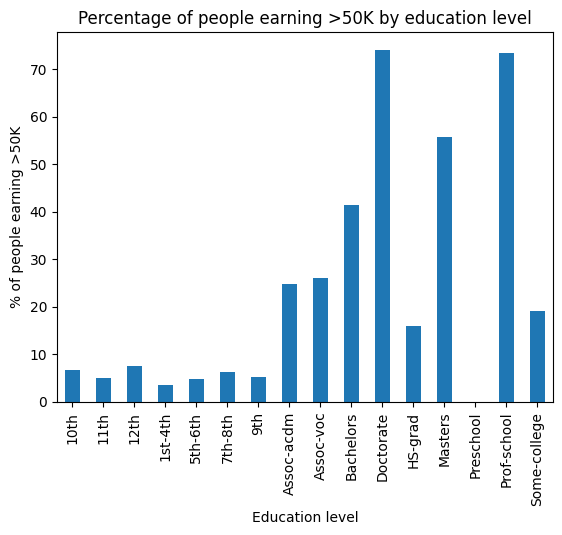

In [10]:
edu_df['>50K_percent'].plot.bar()
plt.title('Percentage of people earning >50K by education level')
plt.xlabel('Education level')
plt.ylabel('% of people earning >50K')
plt.show()

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [11]:
# вывод статистики возраста для каждой расы и каждого пола
data.groupby(['race', 'sex'])['age'].describe()

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

In [12]:
# поиск максимального возраста мужчин расы Amer-Indian-Eskimo
data[(data['race'] == 'Amer-Indian-Eskimo') & (data['sex'] == 'Male')]['age'].max()

82

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [13]:
# добавляю новый признак "marital_status_category"
# значения: "Married" для женатых, "Not married" для холостых
data['marital_status_category'] = np.where(data['marital-status'].str.startswith('Married'), 'Married', 'Not married')

married_records = data.loc[data['marital_status_category'] == 'Married']
married_count = len(married_records)
married_ratio = married_count / total_records * 100
print(f'Married: {married_ratio}%')

not_married_records = data.loc[data['marital_status_category'] == 'Not married']
not_married_count = len(not_married_records)
not_married_ratio = not_married_count / total_records * 100
print(f'Not married: {not_married_ratio}%')

Married: 47.34805442093302%
Not married: 52.65194557906698%


In [14]:
# группирую по "marital_status_category" и считаем долю зарабатывающих больше 50K в каждой группе
income_share_by_marital_status = data.groupby('marital_status_category')['salary'].value_counts(normalize=True).loc[:, '>50K']*100

print(income_share_by_marital_status)

marital_status_category
Married        43.692028
Not married     6.445404
Name: salary, dtype: float64


**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [15]:
max_hours_per_week = data['hours-per-week'].max()
print(max_hours_per_week)

num_max_workers = data[data['hours-per-week'] == max_hours_per_week]['hours-per-week'].count()
print(num_max_workers)

rich_max_workers = data[(data['hours-per-week'] == max_hours_per_week) & (data['salary'] == '>50K')]['salary'].count()
percent_rich_max_workers = rich_max_workers / num_max_workers * 100
print(percent_rich_max_workers)

99
85
29.411764705882355


**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [16]:
data.groupby(['native-country', 'salary'])['hours-per-week'].mean().head(30)

native-country      salary
?                   <=50K     40.164760
                    >50K      45.547945
Cambodia            <=50K     41.416667
                    >50K      40.000000
Canada              <=50K     37.914634
                    >50K      45.641026
China               <=50K     37.381818
                    >50K      38.900000
Columbia            <=50K     38.684211
                    >50K      50.000000
Cuba                <=50K     37.985714
                    >50K      42.440000
Dominican-Republic  <=50K     42.338235
                    >50K      47.000000
Ecuador             <=50K     38.041667
                    >50K      48.750000
El-Salvador         <=50K     36.030928
                    >50K      45.000000
England             <=50K     40.483333
                    >50K      44.533333
France              <=50K     41.058824
                    >50K      50.750000
Germany             <=50K     39.139785
                    >50K      44.977273
Greece       